700 Hz


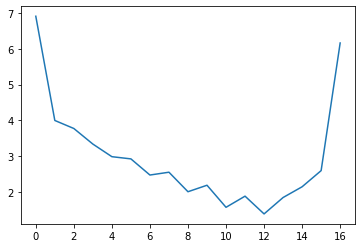

750 Hz


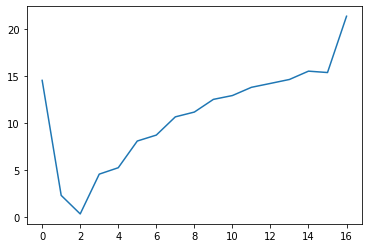

800 Hz


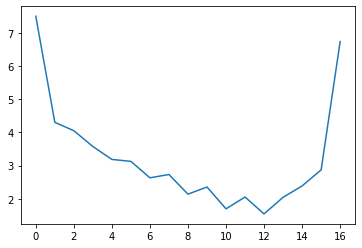

850 Hz


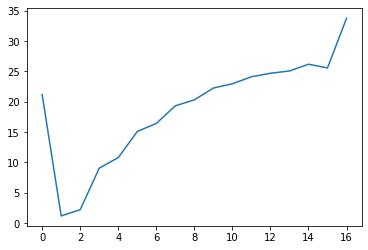

900 Hz


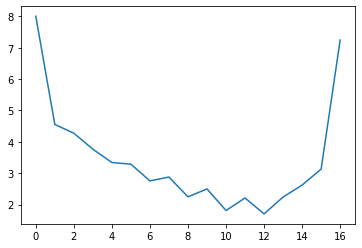

950 Hz


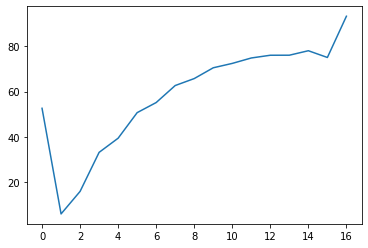

1000 Hz


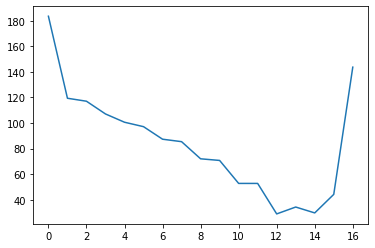

1050 Hz


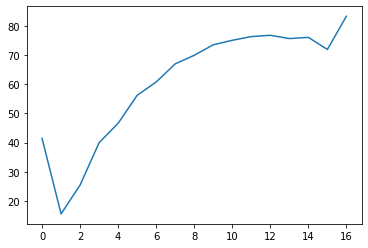

1100 Hz


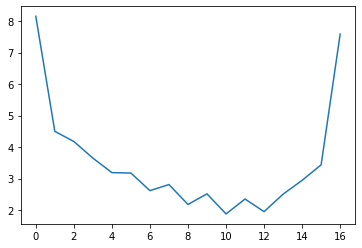

1150 Hz


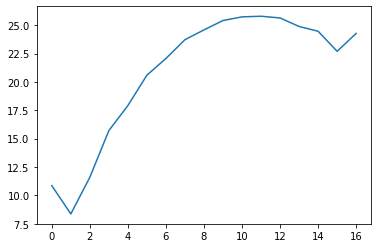

1200 Hz


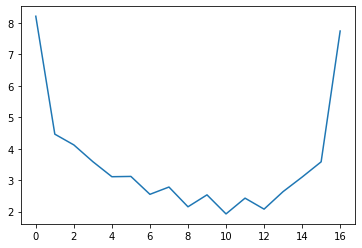

1250 Hz


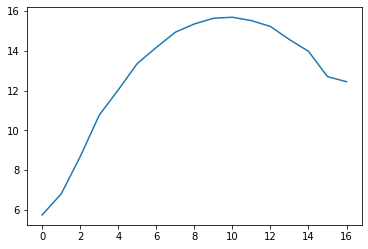

1300 Hz


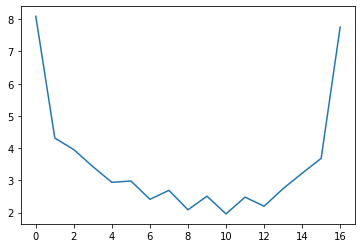

1350 Hz


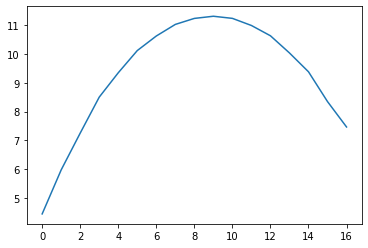

1400 Hz


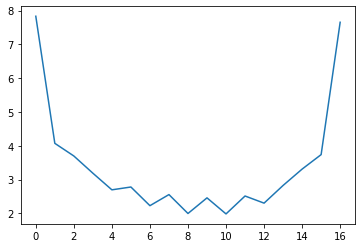

1450 Hz


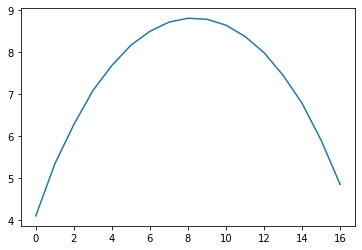

In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

def test_freq(f, t_f, sig):
    analytic_pulse = 0.5 * np.sin(2 * np.pi * f * t_f)
    c = np.correlate(sig, analytic_pulse)
    envelope = abs(signal.hilbert(c))
    return envelope

t = np.linspace(0, 0.01, 480)
tone = np.append(np.zeros(0), np.sin(2 * np.pi * 1000 * t))

t_f = np.linspace(0, 0.01-(0.01*16/480), 464)
for f in range(700, 1500, 50):
    out = test_freq(f, t_f, tone)
    #print(f"{f} Hz - {out}")
    print(f"{f} Hz")
    plt.plot(out)
    plt.show()

700 Hz


C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


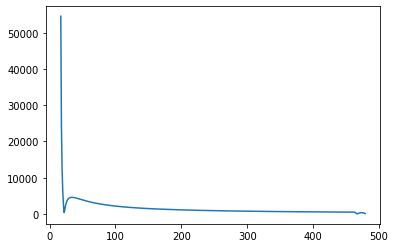

750 Hz


C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


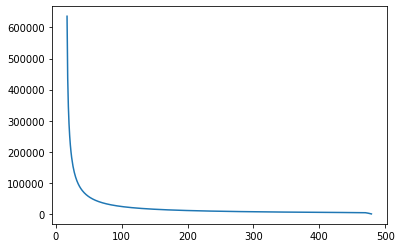

C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


800 Hz


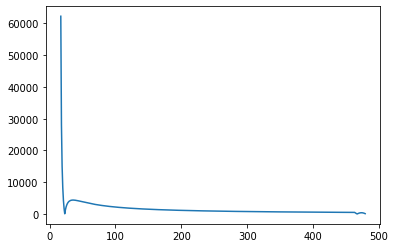

C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


850 Hz


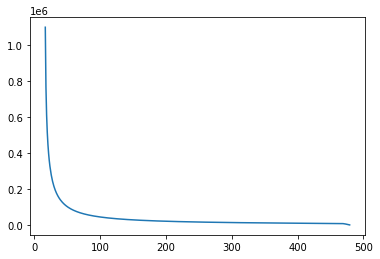

C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


900 Hz


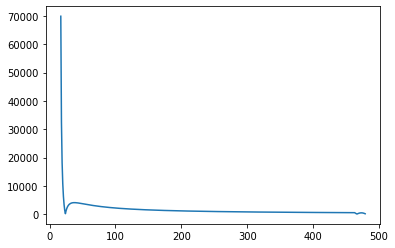

C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


950 Hz


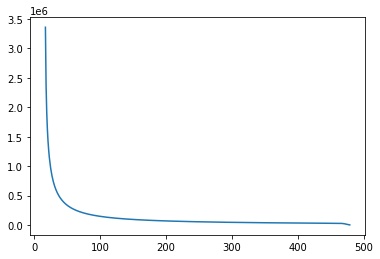

C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


1000 Hz


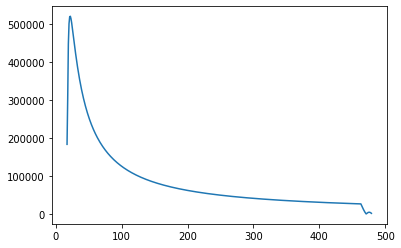

C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


1050 Hz


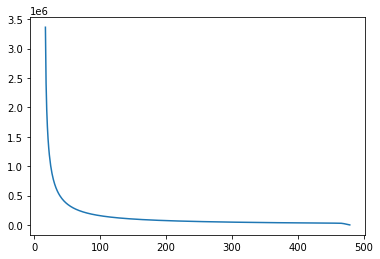

C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


1100 Hz


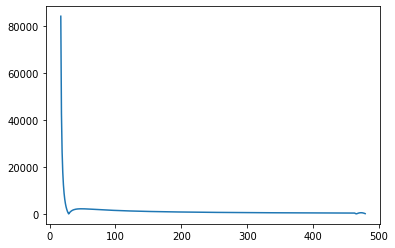

C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


1150 Hz


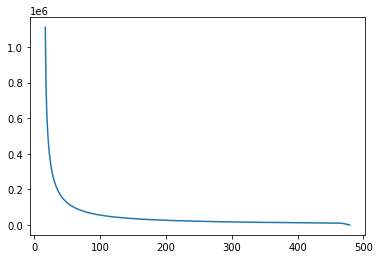

C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


1200 Hz


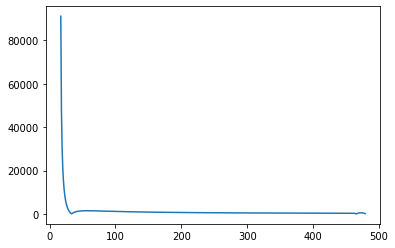

C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


1250 Hz


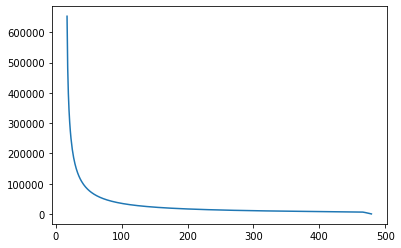

C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


1300 Hz


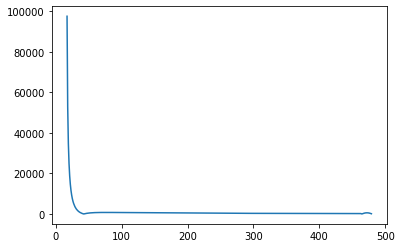

C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


1350 Hz


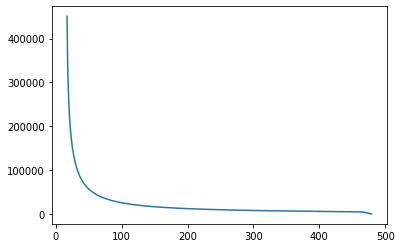

1400 Hz


C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


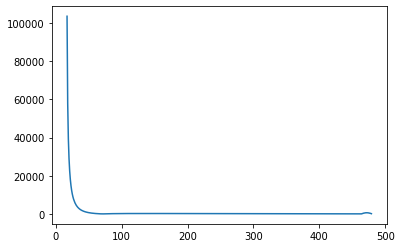

1450 Hz


C:\Users\berna\AppData\Local\Temp\ipykernel_35524\224107009.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


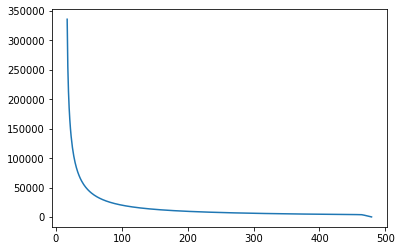

: 

In [4]:

def own_hilbert(sig, space):
    inverse_pi = 1.0/np.pi / space
    return np.convolve(sig, inverse_pi)

def test_freq(f, t_f, sig):
    analytic_pulse = 0.5 * np.sin(2 * np.pi * f * t_f)
    c = np.correlate(sig, analytic_pulse)
    envelope = abs(own_hilbert(c, t_f))
    return envelope

t = np.linspace(0, 0.01, 480)
tone = np.append(np.zeros(0), np.sin(2 * np.pi * 1000 * t))

t_f = np.linspace(0, 0.01-(0.01*16/480), 464)
for f in range(700, 1500, 50):
    out = test_freq(f, t_f, tone)
    #print(f"{f} Hz - {out}")
    print(f"{f} Hz")
    plt.plot(out)
    plt.show()